In [ ]:
# Q1. Problem Statement:Dimensionality Reduction
# Q2. Problem Statement:Linear Discriminant Analysis

# Q1. Problem Statement:Dimensionality Reduction

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [150]:
dairy= pd.read_csv('dairy_product.csv')
dairy

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [151]:
dairy.isnull().sum()

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


In [152]:
df = dairy.drop(['CommonName','MfgName','ScientificName' ], axis=1)
df

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",305.0,18.50,25.10,0.00,0.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",111.0,20.54,0.84,5.41,0.00,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",269.0,0.00,0.00,73.14,73.20,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",90.0,16.10,1.40,2.00,0.00,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [153]:
df.isnull().sum()

ID                  0
FoodGroup           0
ShortDescrip        0
Descrip             0
Energy_kcal         0
Protein_g           0
Fat_g               0
Carb_g              0
Sugar_g             0
Fiber_g             0
VitA_mcg            0
VitB6_mg            0
VitB12_mcg          0
VitC_mg             0
VitE_mg             0
Folate_mcg          0
Niacin_mg           0
Riboflavin_mg       0
Thiamin_mg          0
Calcium_mg          0
Copper_mcg          0
Iron_mg             0
Magnesium_mg        0
Manganese_mg        0
Phosphorus_mg       0
Selenium_mcg        0
Zinc_mg             0
VitA_USRDA          0
VitB6_USRDA         0
VitB12_USRDA        0
VitC_USRDA          0
VitE_USRDA          0
Folate_USRDA        0
Niacin_USRDA        0
Riboflavin_USRDA    0
Thiamin_USRDA       0
Calcium_USRDA       0
Copper_USRDA        0
Magnesium_USRDA     0
Phosphorus_USRDA    0
Selenium_USRDA      0
Zinc_USRDA          0
dtype: int64

In [154]:
print(df.info)

<bound method DataFrame.info of          ID                       FoodGroup                ShortDescrip  \
0      1001          Dairy and Egg Products            BUTTER,WITH SALT   
1      1002          Dairy and Egg Products    BUTTER,WHIPPED,WITH SALT   
2      1003          Dairy and Egg Products        BUTTER OIL,ANHYDROUS   
3      1004          Dairy and Egg Products                 CHEESE,BLUE   
4      1005          Dairy and Egg Products                CHEESE,BRICK   
...     ...                             ...                         ...   
8613  83110  Finfish and Shellfish Products             MACKEREL,SALTED   
8614  90240  Finfish and Shellfish Products  SCALLOP,(BAY&SEA),CKD,STMD   
8615  90480                          Sweets                  SYRUP,CANE   
8616  90560  Finfish and Shellfish Products                   SNAIL,RAW   
8617  93600  Finfish and Shellfish Products            TURTLE,GREEN,RAW   

                                                Descrip  Energy_kca

In [155]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['FoodGroup'] = le.fit_transform(df['FoodGroup'].astype(str))
df['ShortDescrip'] = le.fit_transform(df['ShortDescrip'].astype(str))
df['Descrip'] = le.fit_transform(df['Descrip'].astype(str))
df

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,7,1842,1816,717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,7,1841,1817,717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,7,1837,1812,876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,7,2701,2665,353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,7,2702,2666,371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,10,5194,3811,305.0,18.50,25.10,0.00,0.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,10,7155,5512,111.0,20.54,0.84,5.41,0.00,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,23,7825,7906,269.0,0.00,0.00,73.14,73.20,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,10,7362,5516,90.0,16.10,1.40,2.00,0.00,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [156]:
df1 = df.drop(['ID'], axis=1)
df1

,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,1842,1816,717.0,0.85,81.11,0.06,0.06,0.0,684.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,1841,1817,717.0,0.85,81.11,0.06,0.06,0.0,684.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,1837,1812,876.0,0.28,99.48,0.00,0.00,0.0,840.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,2701,2665,353.0,21.40,28.74,2.34,0.50,0.0,198.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,2702,2666,371.0,23.24,29.68,2.79,0.51,0.0,292.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,5194,3811,305.0,18.50,25.10,0.00,0.00,0.0,47.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,7155,5512,111.0,20.54,0.84,5.41,0.00,0.0,2.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,7825,7906,269.0,0.00,0.00,73.14,73.20,0.0,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,7362,5516,90.0,16.10,1.40,2.00,0.00,0.0,30.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [157]:
x = df1.drop("FoodGroup",axis = 1)
y = df1["FoodGroup"]

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [159]:
x.var()
x_v = x/x.mean()
x_v.var()

ShortDescrip          0.333575
Descrip               0.333449
Energy_kcal           0.559589
Protein_g             0.838212
Fat_g                 2.220740
Carb_g                1.558512
Sugar_g               4.299032
Fiber_g               4.545673
VitA_mcg             68.787804
VitB6_mg              3.277549
VitB12_mcg           12.426439
VitC_mg              52.789196
VitE_mg              19.468913
Folate_mcg           13.753041
Niacin_mg             2.008214
Riboflavin_mg         3.595733
Thiamin_mg            6.101428
Calcium_mg            7.523775
Copper_mcg           10.317163
Iron_mg               4.509842
Magnesium_mg          2.931833
Manganese_mg        160.136991
Phosphorus_mg         1.695188
Selenium_mcg          5.029991
Zinc_mg               2.905286
VitA_USRDA           68.787804
VitB6_USRDA           3.277549
VitB12_USRDA         12.426439
VitC_USRDA           52.789196
VitE_USRDA           19.468913
Folate_USRDA         13.753041
Niacin_USRDA          2.008214
Riboflav

In [160]:
x.shape

(8618, 40)

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 29)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.feature_importances_

array([0.06789836, 0.07766604, 0.03956445, 0.04380381, 0.03694256,
       0.06902563, 0.02491225, 0.0240017 , 0.01140598, 0.01912747,
       0.02794336, 0.02222402, 0.01010208, 0.01694666, 0.02199279,
       0.01394096, 0.02258065, 0.01739398, 0.01549018, 0.02312892,
       0.01933175, 0.02327046, 0.01614666, 0.02125812, 0.02745084,
       0.01094552, 0.02053053, 0.0231679 , 0.02088147, 0.01006187,
       0.01719562, 0.0238903 , 0.01542762, 0.02753717, 0.01934681,
       0.015803  , 0.01847354, 0.01693715, 0.0205126 , 0.02573922])

In [163]:
rf_feat = pd.Series(rf.feature_importances_, index= x_train.columns)
rf_feat

ShortDescrip        0.067898
Descrip             0.077666
Energy_kcal         0.039564
Protein_g           0.043804
Fat_g               0.036943
Carb_g              0.069026
Sugar_g             0.024912
Fiber_g             0.024002
VitA_mcg            0.011406
VitB6_mg            0.019127
VitB12_mcg          0.027943
VitC_mg             0.022224
VitE_mg             0.010102
Folate_mcg          0.016947
Niacin_mg           0.021993
Riboflavin_mg       0.013941
Thiamin_mg          0.022581
Calcium_mg          0.017394
Copper_mcg          0.015490
Iron_mg             0.023129
Magnesium_mg        0.019332
Manganese_mg        0.023270
Phosphorus_mg       0.016147
Selenium_mcg        0.021258
Zinc_mg             0.027451
VitA_USRDA          0.010946
VitB6_USRDA         0.020531
VitB12_USRDA        0.023168
VitC_USRDA          0.020881
VitE_USRDA          0.010062
Folate_USRDA        0.017196
Niacin_USRDA        0.023890
Riboflavin_USRDA    0.015428
Thiamin_USRDA       0.027537
Calcium_USRDA 

In [164]:
x_cor = x.corr()>0.8
x_cor

,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ShortDescrip,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Descrip,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Energy_kcal,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protein_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fat_g,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Carb_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sugar_g,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fiber_g,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
VitA_mcg,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
VitB6_mg,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [165]:
x_cor['ShortDescrip']

ShortDescrip         True
Descrip              True
Energy_kcal         False
Protein_g           False
Fat_g               False
Carb_g              False
Sugar_g             False
Fiber_g             False
VitA_mcg            False
VitB6_mg            False
VitB12_mcg          False
VitC_mg             False
VitE_mg             False
Folate_mcg          False
Niacin_mg           False
Riboflavin_mg       False
Thiamin_mg          False
Calcium_mg          False
Copper_mcg          False
Iron_mg             False
Magnesium_mg        False
Manganese_mg        False
Phosphorus_mg       False
Selenium_mcg        False
Zinc_mg             False
VitA_USRDA          False
VitB6_USRDA         False
VitB12_USRDA        False
VitC_USRDA          False
VitE_USRDA          False
Folate_USRDA        False
Niacin_USRDA        False
Riboflavin_USRDA    False
Thiamin_USRDA       False
Calcium_USRDA       False
Copper_USRDA        False
Magnesium_USRDA     False
Phosphorus_USRDA    False
Selenium_USR

In [166]:
x = x.drop(['Descrip'], axis=1)
print("final shape of DataFrame is",x.shape)

final shape of DataFrame is (8618, 39)


# Q2. Problem Statement:Linear Discriminant Analysis

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [189]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)  
X_train = lda.fit_transform(X_train,Y_train )  
X_test = lda.transform(X_test)

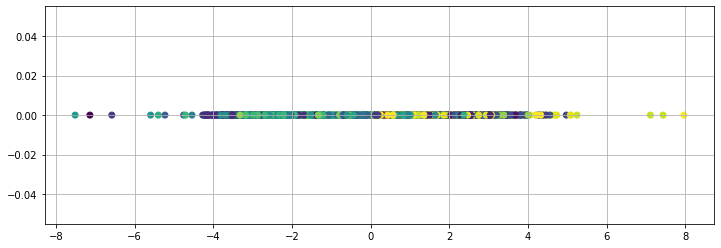

In [190]:
plt.figure(figsize=(12,4))
plt.scatter(X_test, np.zeros(len(X_test)), c=Y_test)
plt.grid()
plt.show()

In [196]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(Y_test, y_pred))) 

Accuracy: 0.22621809744779584
